<a href="https://colab.research.google.com/github/Raul055/AI_2024/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7 - Convolutional Neural Network (CNN)**
---

# **Personal Information**

**Team Members:**
*   Raúl Ramírez Reyes (2006606)
*   Rubén Darío Granados Cantú (2002003)
*   Emanuel Lira Cordero (1997230)

**Career:** Biomedical Engineering

**Group:** 002

**Class:** Artificial Inteligence

**Professor:** Daniel Isaías López Páez

**Hour:** Thursday N4-N6




# **Code**

**Load Libraries**

First we import the needed libraries for the CNN model. We'll use matplotlib, numpy, PIL and tensorflow for keras.

In [5]:
#Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import datasets, layers, models
from keras.datasets import mnist
from random import randint

**Load Data**

We load the data. Here, we will use the MNIST dataset.

In [6]:
#Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Data Preprocessing**

We normalize the pixel values from the imported dataset.

In [7]:
# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

We can observe that the dataset was imported correctly.

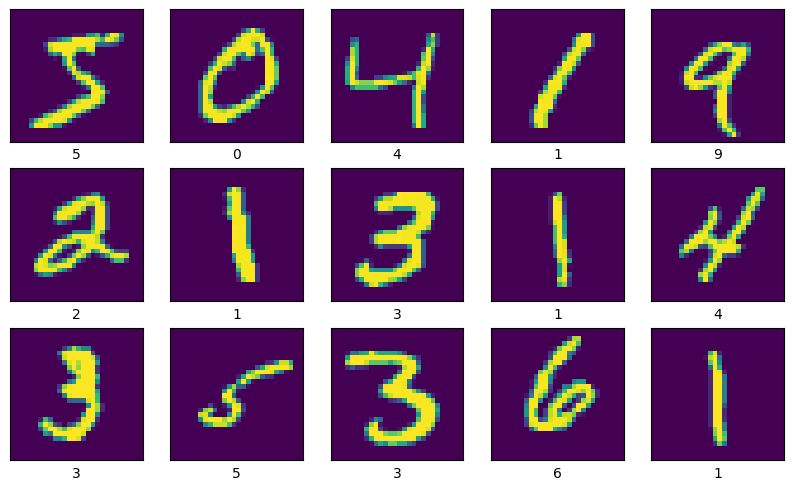

In [8]:
#Show Dataset

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

**Model Selection and Training**

We create the CNN model.

In [9]:
#CNN creation

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #Softmax on top layer

A summary of the structure of the CNN model can be observed.

In [10]:
#Structure of CNN

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

We train the CNN model.

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=8, batch_size=180,
                    validation_data=(test_images, test_labels))

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


334/334 [==============================] - 61s 179ms/step - loss: 0.2972 - accuracy: 0.9122 - val_loss: 0.0708 - val_accuracy: 0.9785
Epoch 2/8
334/334 [==============================] - 58s 172ms/step - loss: 0.0696 - accuracy: 0.9788 - val_loss: 0.0435 - val_accuracy: 0.9857
Epoch 3/8
334/334 [==============================] - 50s 149ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0399 - val_accuracy: 0.9866
Epoch 4/8
334/334 [==============================] - 55s 166ms/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0333 - val_accuracy: 0.9895
Epoch 5/8
334/334 [==============================] - 51s 153ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0276 - val_accuracy: 0.9907
Epoch 6/8
334/334 [==============================] - 48s 145ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0305 - val_accuracy: 0.9901
Epoch 7/8
334/334 [==============================] - 54s 162ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0251 - val_accuracy: 0.9917
Ep

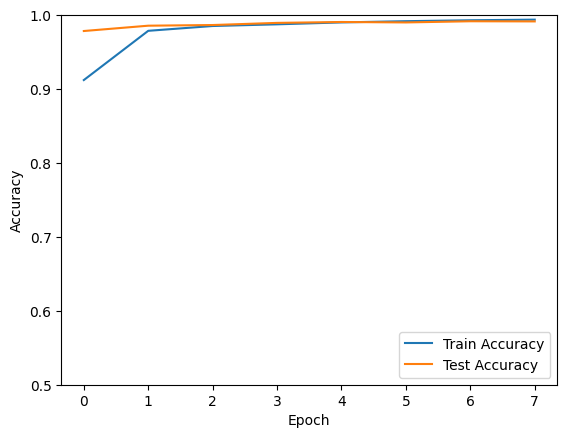

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

**Model Testing**

We test the model with the training done.

1/1 [==============================] - 0s 19ms/step
Predict: 1
Real: 1


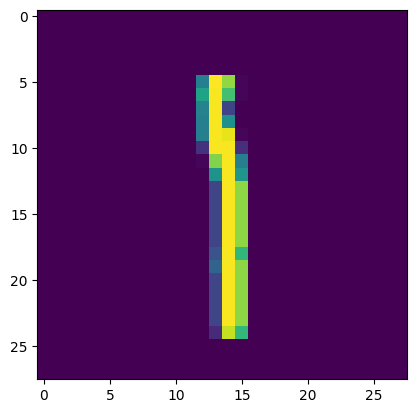

1/1 [==============================] - 0s 20ms/step
Predict: 0
Real: 0


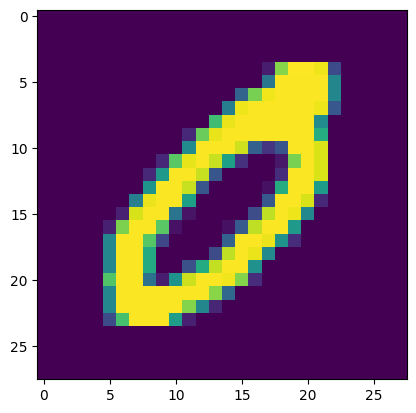

1/1 [==============================] - 0s 21ms/step
Predict: 1
Real: 1


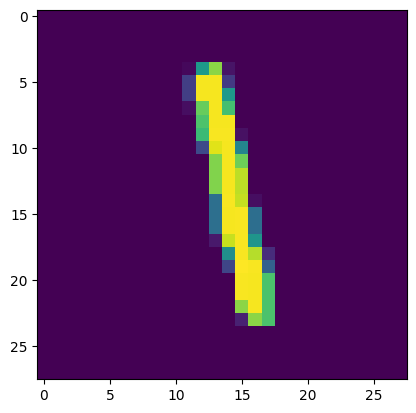

1/1 [==============================] - 0s 20ms/step
Predict: 8
Real: 8


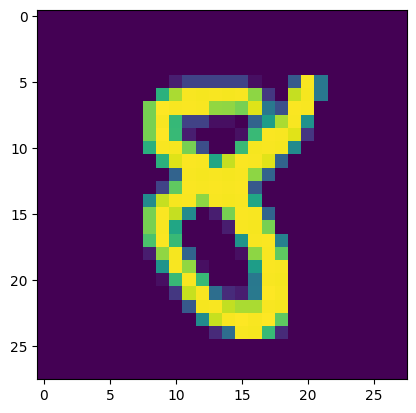

1/1 [==============================] - 0s 20ms/step
Predict: 6
Real: 6


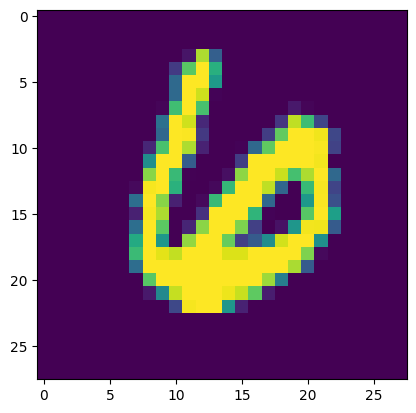

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, steps=5)

# 5 Predictions
for x in range(5):

    # Random index in dataset
    i = randint(0, len(test_images))

    # Prediction
    predict = np.argmax(model.predict(test_images[i:i+1]))

    # Values and images
    print("Predict:", predict)
    print("Real:", test_labels[i])
    plt.imshow(test_images[i])
    plt.show()


**Questions**



*   *How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?*

>  **8, with a batch_size of 180.**

*   *Did you get a better performance on this assignment or on assignment 6? Why?*


> **Yes, the obtained results performed better. The CNN is specifically designed to handle spatially structured data like images efficiently, which often leads to better performance compared to traditional feedforward neural networks. In here, the convolutional layers learn to detect several patters which helps us sort and classify several data.**